experimento GA.03 - caixeiro com gasolina infinita
========================================



## Introdução



O caixeiro com gasolina infinita é um experimento que consiste em simular um caixeiro viajante que passa por cidades e nesse caso temos que achar qual seria a maior possibilidade de caminho, sem que ele passe duas vezes pela mesma cidade. As distâncias entre as cidades serão calculadas de forma aleatória, sendo assim para cada vez que rodamos o código teremos novas cidades e novas distâncias. 



## Objetivo



Encontrar uma solução para o problema do caixeiro viajante. Considere que ele irá visitar 7 ou mais cidades, pode iniciar sua viagem por qualquer uma destas cidades e deve retornar à cidade de início. Durante seu trajeto, não pode visitar a mesma cidade duas vezes (única exceção é a cidade inicial), sendo que temos que achar o maior caminho possível e mostrar a representação gráfica. 



## Importações



In [9]:
import random
from itertools import permutations
import networkx as nx

from funcoes import populacao_inicial_cv as cria_populacao_inicial
from funcoes import funcao_objetivo_pop_cv_gasolina
from funcoes import funcao_objetivo_cv_gasolina
from funcoes import selecao_torneio_min   # esse já temos!
from funcoes import cruzamento_ordenado as funcao_cruzamento
from funcoes import mutacao_de_troca as funcao_mutacao
from funcoes import selecao_torneio_min as funcao_selecao # esse já temos!
from funcoes import cria_cidades


## Códigos e discussão



In [2]:
### CONSTANTES

# relacionadas à busca
TAMANHO_POP = 50
CHANCE_CRUZAMENTO = 0.5
CHANCE_MUTACAO = 0.05
NUM_COMBATENTES_NO_TORNEIO = 3
NUM_GERACOES = 1000


# relacionadas ao problema a ser resolvido
NUMERO_DE_CIDADES = 8
CIDADES = cria_cidades(NUMERO_DE_CIDADES)


In [3]:
def cria_cidades(n):
    """Cria um dicionário aleatório de cidades com suas posições (x,y).
    Args:
      n: inteiro positivo
        Número de cidades que serão visitadas pelo caixeiro.
    Returns:
      Dicionário contendo o nome das cidades como chaves e a coordenada no plano
      cartesiano das cidades como valores.
    """

    cidades = {}

    for i in range(n):
        cidades[f"Cidade {i}"] = (random.random(), random.random()) #criamos por tuplas, para nao mudar onde estão as cidades durante o provblema

    return cidades


In [4]:
# Funções locais

def funcao_objetivo_pop(populacao):
    return funcao_objetivo_pop_cv_gasolina(populacao, CIDADES)

def funcao_objetivo_individuo(individuo):
    return funcao_objetivo_cv_gasolina(individuo, CIDADES)

In [11]:
# Busca por algoritmo genético

populacao = cria_populacao_inicial(TAMANHO_POP, CIDADES)

melhor_fitness_ja_visto = float("inf")  # é assim que escrevemos infinito em python

for n in range(NUM_GERACOES):
    
    # Seleção
    fitness = funcao_objetivo_pop(populacao)
    populacao = funcao_selecao(populacao, fitness)
    
    # Cruzamento
    pais = populacao[0::2]
    maes = populacao[1::2]
    
    contador = 0
    
    for pai, mae in zip(pais, maes):
        if random.random() <= CHANCE_CRUZAMENTO:
            filho1, filho2 = funcao_cruzamento(pai, mae)
            populacao[contador] = filho1
            populacao[contador + 1] = filho2
        
        contador = contador + 2   
        
    # Mutação
    for n in range(len(populacao)):
        if random.random() <= CHANCE_MUTACAO:
            individuo = populacao[n]
            populacao[n] = funcao_mutacao(individuo)            
            
    # melhor individuo já visto até agora
    fitness = funcao_objetivo_pop(populacao)
    menor_fitness = min(fitness)
    if menor_fitness < melhor_fitness_ja_visto:        
        posicao = fitness.index(menor_fitness)
        melhor_individuo_ja_visto = populacao[posicao]
        melhor_fitness_ja_visto = menor_fitness  

In [12]:
# Busca testando todas as permutações

melhor_fitness_ever = float("inf")

# testando todas as permutações possíveis
for caminho in permutations(list(CIDADES.keys())):
    distancia = funcao_objetivo_individuo(caminho)
    if distancia < melhor_fitness_ever:
        melhor_fitness_ever = distancia
        melhor_resposta_ever = caminho

In [19]:
# Checando os resultados

print()
print("Melhor individuo obtido por algoritmos genéticos:")
print(melhor_individuo_ja_visto, "com distância:",abs( melhor_fitness_ja_visto))

print()
print("Melhor individuo obtido por busca exaustiva:")
print(melhor_resposta_ever, "com distância:", abs(melhor_fitness_ever))


Melhor individuo obtido por algoritmos genéticos:
['Cidade 3', 'Cidade 4', 'Cidade 6', 'Cidade 1', 'Cidade 7', 'Cidade 5', 'Cidade 0', 'Cidade 2'] com distância: 5.362213325971295

Melhor individuo obtido por busca exaustiva:
('Cidade 0', 'Cidade 4', 'Cidade 7', 'Cidade 1', 'Cidade 6', 'Cidade 5', 'Cidade 3', 'Cidade 2') com distância: 5.362213325971295


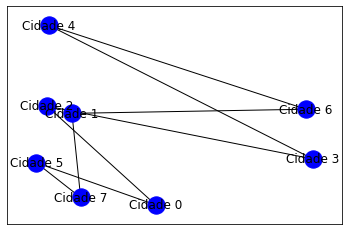

In [16]:
# Representação gráfica:
g = nx.Graph()
for i in list(CIDADES.keys()):
    g.add_node(i)
k = -1
while k < len(melhor_individuo_ja_visto)-1:
    g.add_edge(melhor_individuo_ja_visto[k], melhor_individuo_ja_visto[k+1])
    k+=1
vertices = CIDADES.keys()
pos = nx.spring_layout(g,pos=CIDADES, fixed = vertices)
nx.draw_networkx(g,pos,node_color = 'b')

#### discussão 

A função objetivo pega menos a distância, porque é um problema de maximização, quando nós comparamos com o problema do caixeiro viajante normal. Outro problema que surgiu foi a maior distância que ficou negativa, porém o número estava certo, para remediar isso, foi necessário pegar só o `abs` da melhor distância.

## Conclusão




O problema do caixeiro viajante com gasolina infinita consiste em encontrar a rota mais curta para um caixeiro que precisa visitar todas as cidades em um mapa, sem se preocupar com o consumo de combustível, ou seja, assumindo que a gasolina é infinita.

Para solucionar esse problema usando algoritmos genéticos, podemos representar cada solução como uma sequência de cidades que devem ser visitadas e aplicar operadores de seleção, recombinação e mutação em uma população de soluções candidatas. O objetivo é encontrar a solução mais curta, ou seja, aquela que minimiza a distância total percorrida pelo caixeiro.

Ao final, chegamos à lista com a sequência de cidades que se encaixa ao nosso problema, o qual um gráfo é plotado mostrando as cidades, e o comparamos com uma busca exaustiva, sendo que os resultados foram iguais e o algoritmo genético tende a ser mais rápido para rodar.


## Playground



Todo código de teste que não faz parte do seu experimento deve vir aqui. Este código não será considerado na avaliação.

